# HMCTuning

Author: <b>Ignacio Peis</b>


In [25]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src import *
from examples import *


# Sampling

Firstly, we need a function to return the objective, $\log p(x)$

In [26]:
## Gaussian Mixture

# Load the log probability function of MoG, and the initial proposal
logp = get_logp('wave')
mu0_pre, var0_pre = initial_proposal('wave')   # [0, 0],  [0.01, 0.01]


You can see here how the distribution looks like:

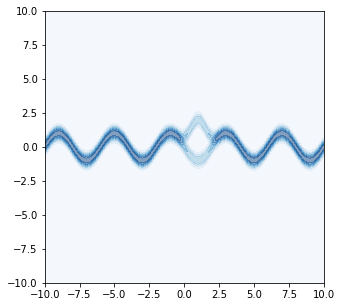

In [27]:
f, ax = plt.subplots(figsize=(5, 5))
plot_density('wave', ax)

Firstly, the HMC is initialized using:

In [28]:
# Create the HMC object
hmc = HMC(dim=2, logp=logp, T=5,  L=5, chains=100, chains_sksd=30, mu0=mu0_pre, var0=var0_pre, vector_scale=True)

To obtain 1000 samples from the HMC object, just run:

(-10.0, 10.0)

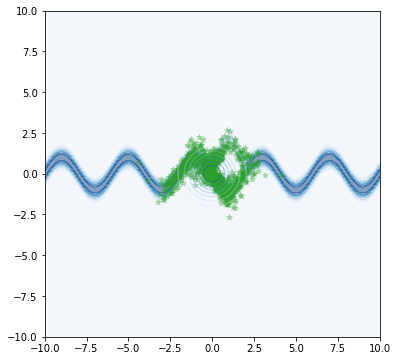

In [29]:
samples_pre, chains = hmc.sample(chains=1000)

# Numpy samples for plotting with maplotlib
samples_pre = samples_pre.detach().numpy()

f, ax = plt.subplots(figsize=(6, 6))
plot_density('wave', ax)
ax.scatter(samples_pre[0, :, 0], samples_pre[0, :, 1], marker='*', color='tab:green', alpha=0.3)

xmin, xmax, ymin, ymax = get_grid_lims('wave')   
xgrid = np.linspace(xmin, xmax, 1000)
ygrid = np.linspace(ymin, ymax, 1000)
plot_bi_gaussian(mu0_pre, var0_pre, xgrid, ygrid, ax)
ax.set_xlim(xmin, xmax) 
ax.set_ylim(ymin, ymax) 



To fit the hyperparameters:

In [30]:
hmc.fit(steps=100)

HMC (objective=-0.192834): 100%|██████████| 80/80 [00:04<00:00, 16.34it/s]  


Text(0.5, 1.0, 'After training')

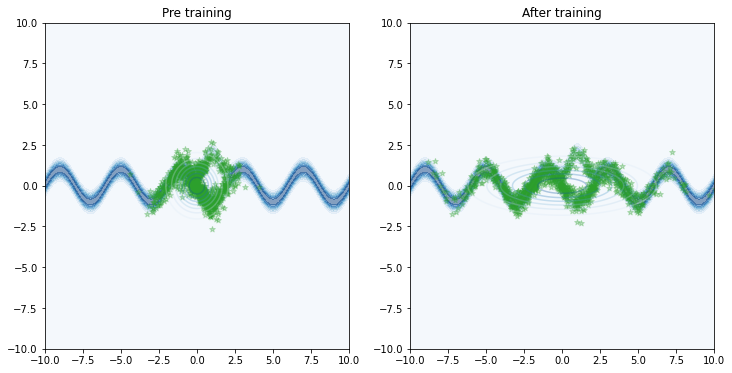

In [31]:
samples, chains = hmc.sample(chains=1000)

# Numpy samples for plotting with maplotlib
samples = samples.detach().numpy()

f, ax = plt.subplots(1, 2, figsize=(12, 6))
[plot_density('wave', axis) for axis in ax]

ax[0].scatter(samples_pre[0, :, 0], samples_pre[0, :, 1], marker='*', color='tab:green', alpha=0.3)
ax[1].scatter(samples[0, :, 0], samples[0, :, 1], marker='*', color='tab:green', alpha=0.3)

mu0 = hmc.mu0.detach().numpy()
var0 = torch.exp(hmc.logvar0) * torch.exp(2*hmc.log_inflation)
var0 = var0.detach().numpy()

xmin, xmax, ymin, ymax = get_grid_lims('wave')   
xgrid = np.linspace(xmin, xmax, 1000)
ygrid = np.linspace(ymin, ymax, 1000)

plot_bi_gaussian(mu0_pre, var0_pre, xgrid, ygrid, ax[0])
plot_bi_gaussian(mu0, var0, xgrid, ygrid, ax[1])

[axis.set_xlim(xmin, xmax) for axis in ax]
[axis.set_ylim(ymin, ymax) for axis in ax]

ax[0].set_title('Pre training')
ax[1].set_title('After training')


Text(0.5, 0, 'step')

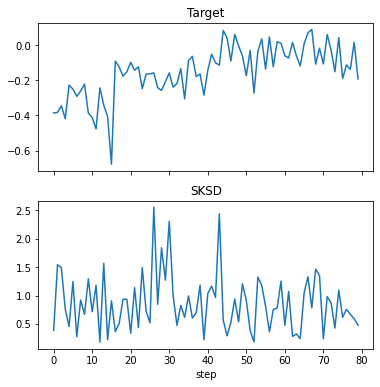

In [32]:
f, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

ax[0].plot(hmc.objective)
ax[0].set_title('Target')
ax[1].plot(hmc.sksd)
ax[1].set_title('SKSD')
plt.xlabel('step')
